In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/prash/OneDrive/Desktop/Projects/data/world_stock_data.csv")

# See structure
print(df.shape)
print(df.columns)
df.head()

(310122, 13)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name',
       'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')


,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
0,2025-07-03 00:00:00-04:00,6.630000,6.740000,6.615000,6.640000,4209664.0,peloton,PTON,fitness,usa,0.0,0.0,NaN
1,2025-07-03 00:00:00-04:00,106.750000,108.370003,106.330101,107.339996,560190.0,crocs,CROX,footwear,usa,0.0,0.0,NaN
2,2025-07-03 00:00:00-04:00,122.629997,123.050003,121.550003,121.930000,36600.0,adidas,ADDYY,apparel,germany,0.0,0.0,NaN
3,2025-07-03 00:00:00-04:00,221.705002,224.009995,221.360001,223.410004,29295154.0,amazon,AMZN,e-commerce,usa,0.0,0.0,NaN
4,2025-07-03 00:00:00-04:00,212.145004,214.649994,211.810104,213.550003,34697317.0,apple,AAPL,technology,usa,0.0,0.0,NaN


In [7]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 241.5 kB/s eta 0:00:32
   -- ------------------------------------- 0.5/8.1 MB 241.5 kB/s eta 0:00:32
   --- ------------------------------------ 0.8/8.1 MB 346.5 kB/s eta 0:00:22
   ----- ---------------------------------- 1.0/8.1 MB 446.3 kB/s eta 0:00:16
   ------- -------------------------------- 1.6/8.1 MB 646.0 kB/s eta 0:00:11
   ---------- ----------------------------- 2.1/8

C:\Users\prash\AppData\Local\Temp\ipykernel_19524\1659816461.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_stock['Date'] = pd.to_datetime(df_stock['Date'])


<Axes: title={'center': 'AMZN Closing Prices'}, xlabel='Date'>

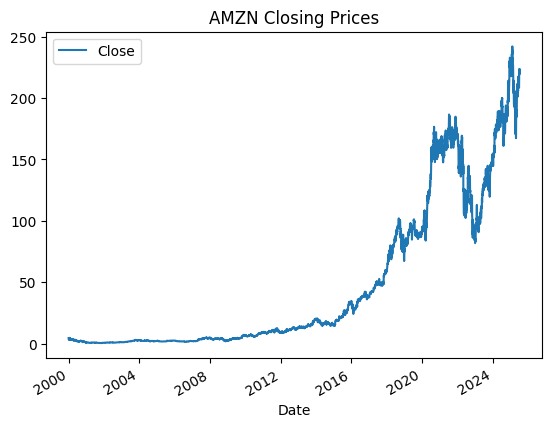

In [2]:
stock = "AMZN"  # or any symbol you see in the dataset
df_stock = df[df['Ticker'] == stock].copy()
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock = df_stock.sort_values('Date')
df_stock.set_index('Date', inplace=True)
df_stock[['Close']].plot(title=f"{stock} Closing Prices")

<Axes: title={'center': 'AMZN Price with MA50 & MA200'}, xlabel='Date'>

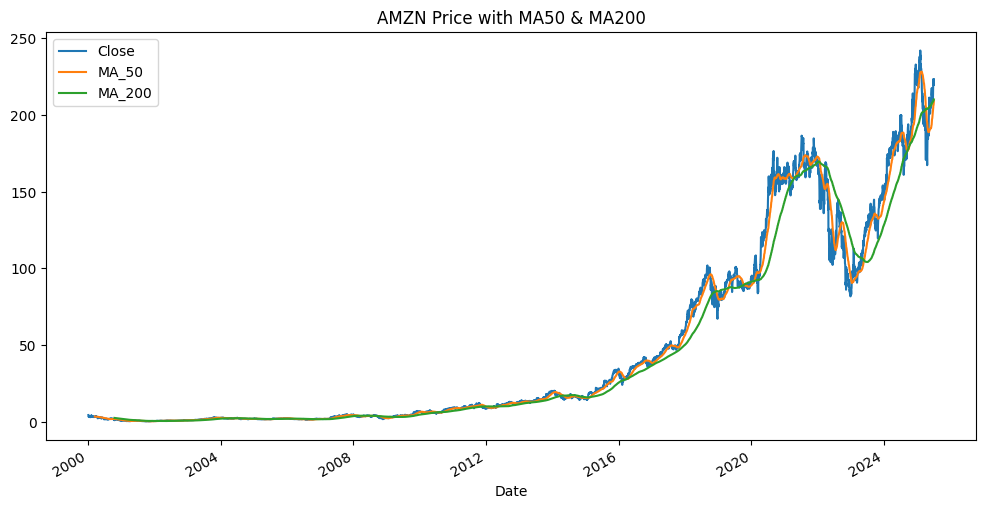

In [3]:
df_stock['MA_50'] = df_stock['Close'].rolling(window=50).mean()
df_stock['MA_200'] = df_stock['Close'].rolling(window=200).mean()

df_stock[['Close', 'MA_50', 'MA_200']].plot(title=f"{stock} Price with MA50 & MA200", figsize=(12, 6))

<Axes: title={'center': 'AMZN RSI'}, xlabel='Date'>

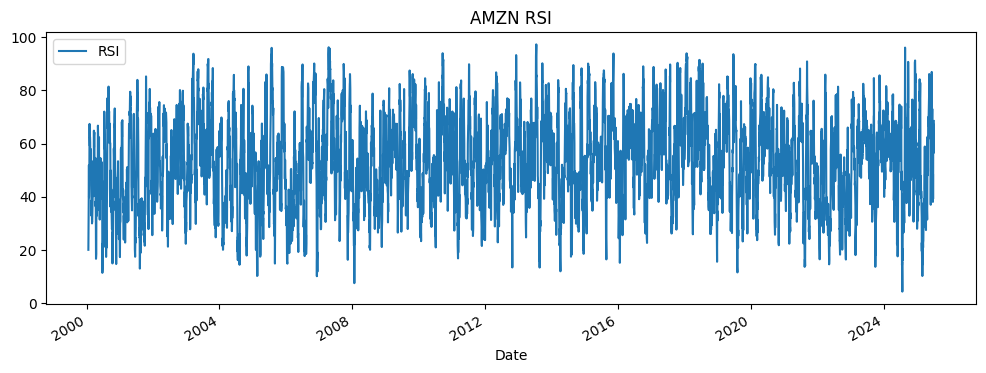

In [4]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df_stock['RSI'] = compute_rsi(df_stock['Close'])
df_stock[['RSI']].plot(title=f"{stock} RSI", figsize=(12, 4))

<Axes: title={'center': 'AMZN Closing Price with 50 & 200 Day Moving Averages'}, xlabel='Date'>

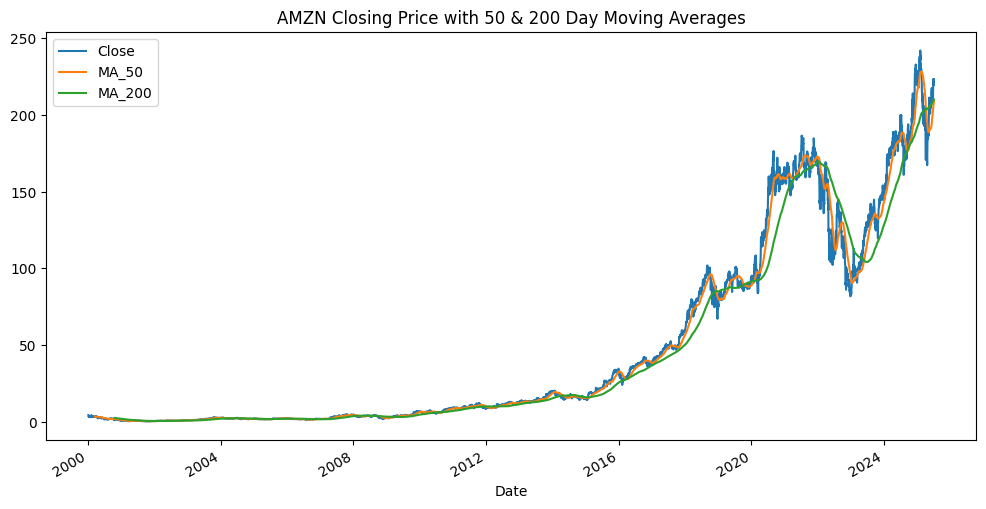

In [5]:
# Calculate 50-day and 200-day moving averages
df_stock['MA_50'] = df_stock['Close'].rolling(window=50).mean()
df_stock['MA_200'] = df_stock['Close'].rolling(window=200).mean()

# Plot with moving averages
df_stock[['Close', 'MA_50', 'MA_200']].plot(
    title=f"{stock} Closing Price with 50 & 200 Day Moving Averages",
    figsize=(12, 6)
)

In [6]:
df_stock['Signal'] = 0
df_stock['Signal'][df_stock['MA_50'] > df_stock['MA_200']] = 1
df_stock['Crossover'] = df_stock['Signal'].diff()

C:\Users\prash\AppData\Local\Temp\ipykernel_19524\2686307604.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_stock['Signal'][df_stock['MA_50'] > df_stock['MA_200']] = 1
C:\Users\prash\AppData\Local\Temp\ipykernel_19524\2686307604.py:2

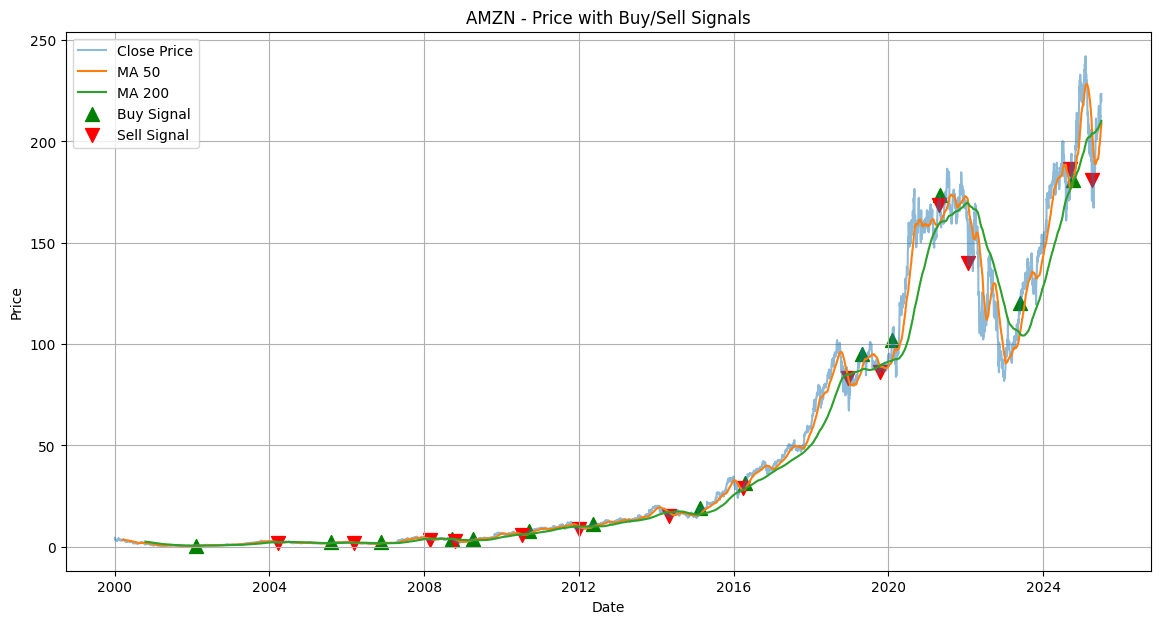

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df_stock.index, df_stock['Close'], label='Close Price', alpha=0.5)
plt.plot(df_stock.index, df_stock['MA_50'], label='MA 50')
plt.plot(df_stock.index, df_stock['MA_200'], label='MA 200')

# Buy signals
buy_signals = df_stock[df_stock['Crossover'] == 1]
plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', color='green', s=100)

# Sell signals
sell_signals = df_stock[df_stock['Crossover'] == -1]
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', color='red', s=100)

plt.title(f'{stock} - Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df_stock['Strong_Buy'] = ((df_stock['Signal'] == 1) & (df_stock['RSI'] < 30)).astype(int)

In [9]:
df_stock[df_stock['Strong_Buy'] == 1][['Close', 'RSI', 'MA_50', 'MA_200']].head()

,Close,RSI,MA_50,MA_200
Date,,,,
2002-04-11 00:00:00-04:00,0.6370,27.204516,0.70638,0.570532
2002-04-12 00:00:00-04:00,0.6655,29.963899,0.70579,0.570727
2002-06-05 00:00:00-04:00,0.8995,25.063949,0.81572,0.602975
2002-06-10 00:00:00-04:00,0.8650,28.092249,0.82639,0.608883
2002-06-13 00:00:00-04:00,0.8715,24.750011,0.83532,0.614225


In [10]:
df_stock.to_csv("C:/Users/prash/OneDrive/Desktop/Projects/data/amzn_signals.csv")